## Salary Data Exploration Project
### Project Description
In 2019 Kaggle hosted an open data scientist competition. The competition was titled "Kaggle ML & DS Survey Challenge". The challenge prompt was as follows: *"tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration"* (https://www.kaggle.com/c/kaggle-survey-2019/data). The repository addresses the prompt providing insight into ... Mainly, the nature of women's represenation in DS & ML along with the effects of education on income level will be explored.

### Exploratory Data Analysis: Survey Dataset
To begin our analysis of the datasets, we must import them first.

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

dataset_folder = "dataset/"
mc_dataset = "multiple_choice_responses.csv"
salary_dataset = "clean_kaggle_data.csv"

mc_df = pd.read_csv(dataset_folder + mc_dataset)
salary_df = pd.read_csv(dataset_folder + salary_dataset)

In [338]:
print("Salary DF shape = {}".format(salary_df.shape))

Salary DF shape = (12497, 247)


The salary dataset has 12497 entries and 247 columns. We will consider the columns pertaining to country, age, education, professional experience, and salary.

In [340]:
# Selecting and renaming the aformentioned columns:
salary_df = salary_df[["Q2", "Q3", "Q1", "Q4", "Q5", "Q10"]]
salary_df = salary_df.rename(columns={"Q2": "sex", "Q3": "country", "Q1": "age", "Q4": "educ", "Q5": "prof_exp", "Q10": "salary"})
columns = ["sex", "country", "age", "educ", "prof_exp", "salary"]
salary_df.head()

KeyError: "None of [Index(['Q2', 'Q3', 'Q1', 'Q4', 'Q5', 'Q10'], dtype='object')] are in the [columns]"

In [ ]:
salary_df[columns[:5]].describe()

In [249]:
salary_df["salary"].describe()

count     12497.000000
mean      57124.189806
std       73710.709307
min        1000.000000
25%        7500.000000
50%       30000.000000
75%       80000.000000
max      500000.000000
Name: salary, dtype: float64

The following provides insight into the possible values that each entry can take with respect to each column:

- country (Q3): e.g. "Canada", "India"
- age (Q1): "18-21", "22-24", "25-29", "30-34", "35-39"
- educ (Q4): e.g. "Master's degree"
- prof_exp (Q5): e.g. "Data Scientist", "Software Engineer"
- salary (Q10): ranges from 1k-500k (float64)

#### Countplot of Country Data
The Figure below illustrates the distribution of data with respect to the country column. As we can see, the responses came primarily from people from India and the United States.

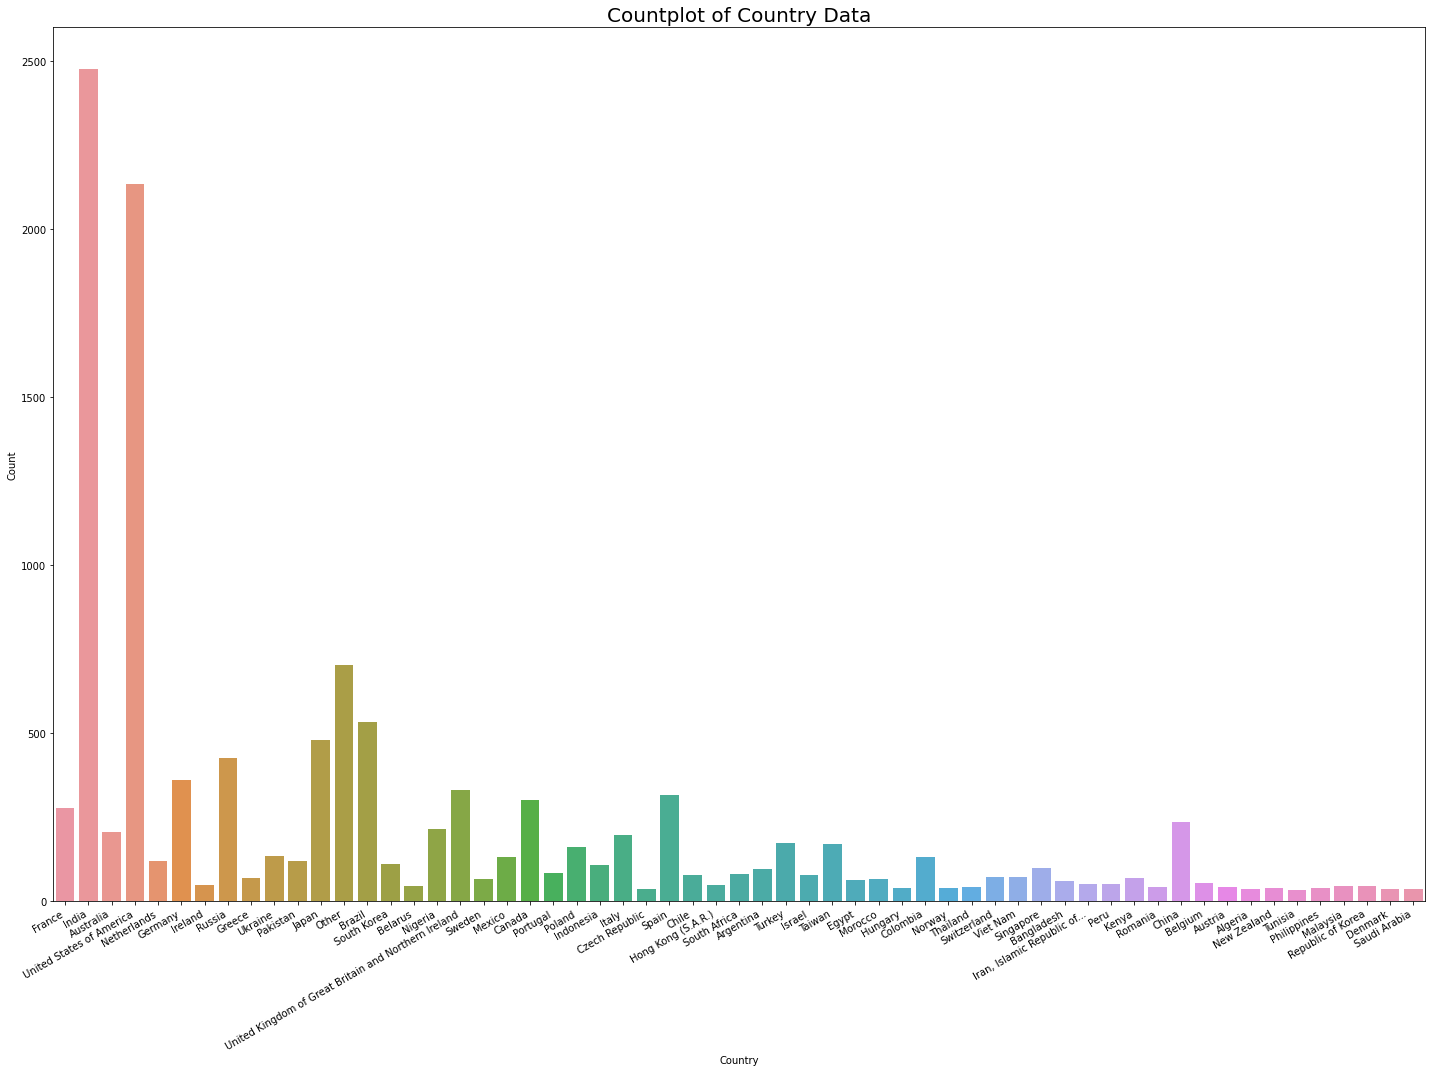

In [250]:
plt.figure(figsize=(20,15))
plt.title("Countplot of Country Data", fontsize=20)
country_plot = sb.countplot(x='country', data=salary_df)
country_plot.set_xticklabels(country_plot.get_xticklabels(), size=10 ,rotation=30, ha="right")
country_plot.set_xlabel("Country")
country_plot.set_ylabel("Count")
plt.tight_layout()
plt.show()

#### Boxplot of Salary vs. Education
From the boxplot below, we can see that the average salary of people who obtained a master's degree or doctoral degree is higher than the average salary of those who obtained a bachelor's degree, those who chose not to answer, and those who received some post-secondary education without obtaining a bachelor's degree. We can also see that the earning potential delineated by the maximum values (between the 3rd quartile and the outliers) of the doctoral boxplot stretch significantly higher than any other education tier. 


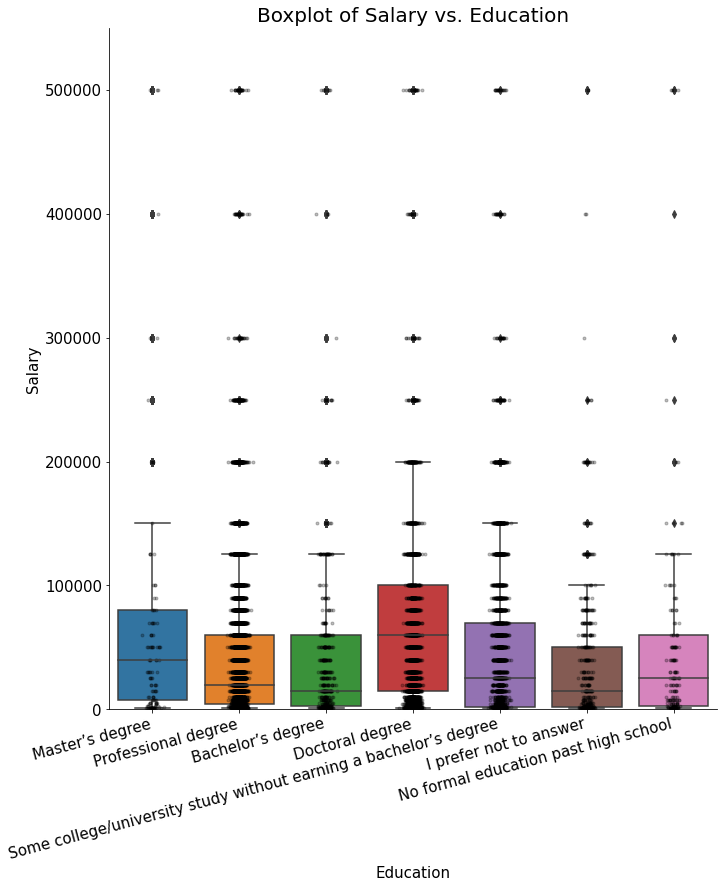

In [309]:
education_list = salary_df["educ"].unique()
salary_box = sb.catplot(x='educ', y='salary', kind='box', data=salary_df, height=10, showfliers=True)
salary_box.set_xticklabels(size=15, rotation=15, ha="right")
salary_box.set_yticklabels(size=15)
salary_box.set_ylabels("Salary", size=15)
salary_box.set_xlabels("Education", size=15)

for i in [0, 1, 2, 3, 4, 5, 6]:
    y = salary_df.salary[salary_df.educ==education_list[i-1]].dropna()        
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.25)

plt.ylim(0, 550000)
plt.title("Boxplot of Salary vs. Education", fontsize=20)
plt.show()

#### Salary Histogram

Text(0.5, 1.0, 'Histogram of Salary')

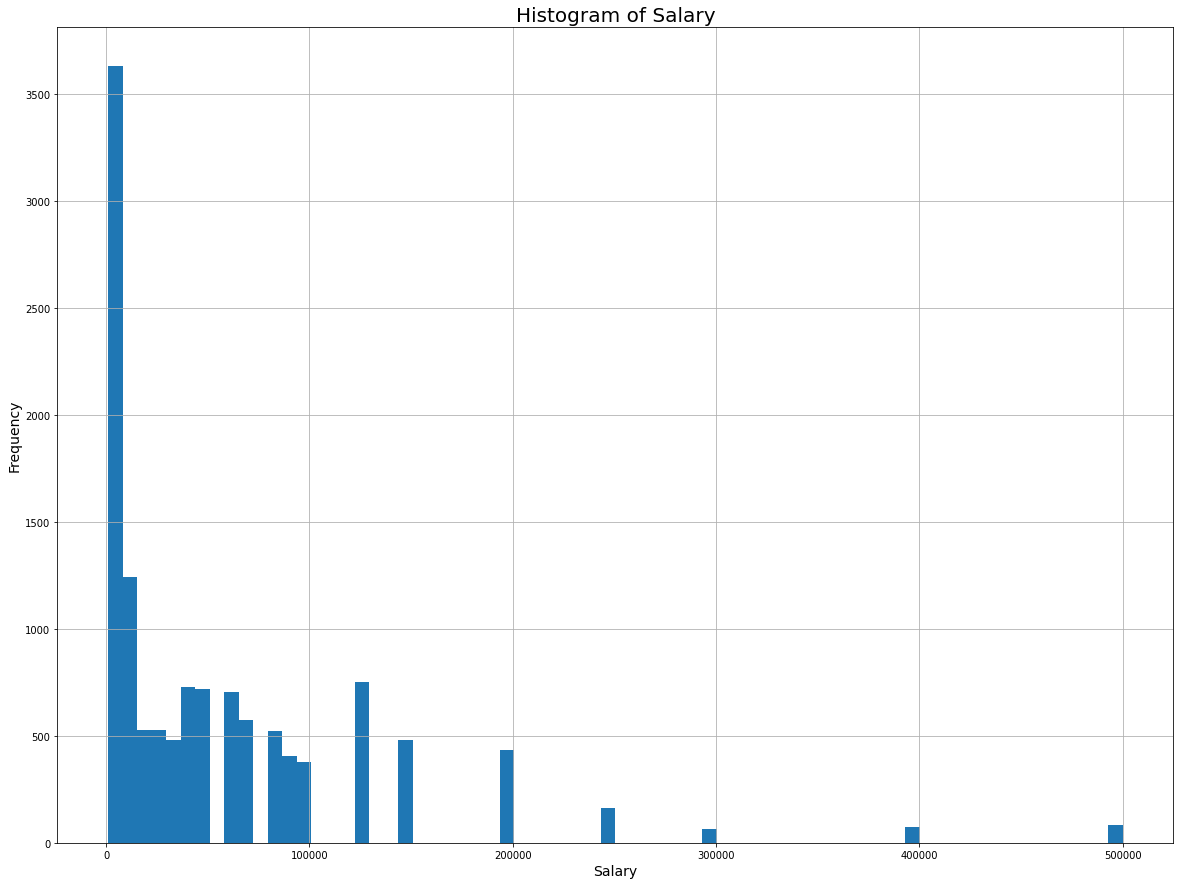

In [363]:
fig, ax = plt.subplots(figsize=(20,15))

salary_df['salary'].hist(bins=70, ax=ax)

plt.xlabel('Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Salary', fontsize=20)

### Estimating the Difference Between Average Salary of Males vs. Females
#### Descriptive Statistics

sex         12497
country     12497
age         12497
educ        12497
prof_exp    12497
salary      12497
dtype: int64


sex         12497
country     12497
age         12497
educ        12497
prof_exp    12497
salary      12497
dtype: int64

In [255]:
males_df = salary_df[salary_df["sex"] == "Male"]
females_df = salary_df[salary_df["sex"] == "Female"]
print("Number of males in the dataset = {}".format(males_df.shape[0]))
print("Number of females in the dataset = {}".format(females_df.shape[0]))
print("Number of people that prefer to self-describe or prefer not to say = {}".format(salary_df[salary_df["sex"] != "Male"][salary_df["sex"] != "Female"].shape[0]))

Number of males in the dataset = 10473
Number of females in the dataset = 1827
Number of people that prefer to self-describe or prefer not to say = 197


In [310]:
males_df.salary.describe()

count     10473.000000
mean      58709.586556
std       74920.620048
min        1000.000000
25%        7500.000000
50%       30000.000000
75%       80000.000000
max      500000.000000
Name: salary, dtype: float64

In [311]:
females_df.salary.describe()

count      1827.000000
mean      45933.771210
std       60253.789591
min        1000.000000
25%        3000.000000
50%       20000.000000
75%       70000.000000
max      500000.000000
Name: salary, dtype: float64

In [258]:
# Possible Professional Occupations:
salary_df["prof_exp"].unique()

array(['Software Engineer', 'Other', 'Data Scientist', 'Statistician',
       'Product/Project Manager', 'Data Analyst', 'Research Scientist',
       'Business Analyst', 'Data Engineer', 'DBA/Database Engineer'],
      dtype=object)

As we can see from the above descriptive statistics, the average salary of men and women working in the occupations listed above is different. Men make \$58,710 on average whereas women make \$45,934 according to this sample. The next section will perform a two-sample t-test to determine if this result is statistically significant.

#### Two-Sample t-Test

Given that the sample sizes of both groups is greater than 30 and that we are making inferences about the mean, the distribution of the sample means is normal. We will also assume that the variances of the two samples are identical. Since we do not know the standard deviation or mean of the population, we will use a t-test. Our null hypothesis is that the means of the salaries earned by men and women are equal. Our alternate hypothesis is that the means are different, i.e., the average salary women earn is less than or greater than the average salary men earn. The following code snippet computes the t and p value for the the male and female data samples:

In [259]:
tc, pc = stats.ttest_ind(males_df["salary"], females_df["salary"])
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 6.90935  p = 5.10894e-12


The p-value, or, the probability that we observed these two completely random samples in a world where the null hypothesis is true, i.e. the world in which the means of the salaries of men and women are equal, is 5.10894e-12%. This is less than our threshold of 0.05. Therefore, the difference between the means of these two samples is statistically significant. 

#### Bootstrapping
We will now compare the two samples using bootstrapping. To do so, we will generate 1000 bootstrap samples for each group. Each of these generated samples will be the same size as the sample it was generated from. Given that we are generating 1000 bootstrap samples, we expect the distribution of the sample means to be normal for both groups. 

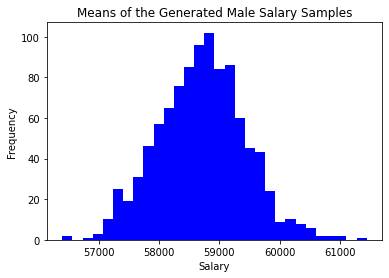

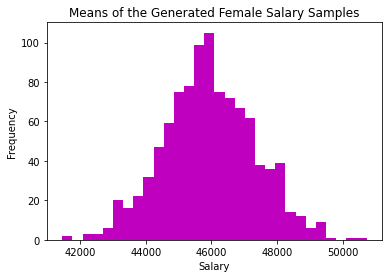

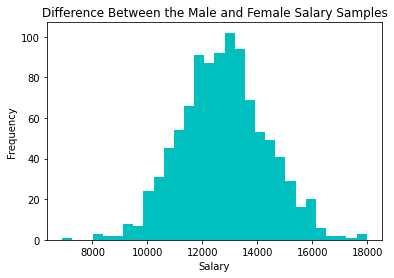

In [365]:
np.random.seed(10)
male_means = np.zeros(1000, dtype=float)
female_means = np.zeros(1000, dtype=float)

for i in range(1000):
    male_sample = np.random.choice(males_df.salary, replace=True, size=males_df.salary.shape[0])
    female_sample = np.random.choice(females_df.salary, replace=True, size=females_df.salary.shape[0])

    female_means[i] = np.mean(female_sample)
    male_means[i] = np.mean(male_sample)
    
bootstrap_difference = male_means - female_means

plt.hist(male_means, bins=30, color='b')
plt.title("Means of the Generated Male Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(female_means, bins=30, color='m')
plt.title("Means of the Generated Female Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(bootstrap_difference, bins=30, color='c')
plt.title("Difference Between the Male and Female Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

#### Two-Sample t-Test
1000 data points were created as a result of the bootstrapping process. Therefore, since we have more than 30 data points and we are making inferences about the means of the male and female groups, the distribution of the sample means sampled from the original distributions is normal. Further, since we do not know the standard deviation or the variance of the population, a t-test is in order (as opposed to a z-test). Just as before, our null hypothesis is that the means of the populations of the two samples are equivalent. Our alternate hypothesis is that they're different. 

In [352]:
tc, pc = stats.ttest_ind(male_means, female_means)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 258.205  p = 0


Since p is very close to 0 (p cannot be zero because there is a small probability that we observed the bootstrapped data) and is therefore lesss than our threshold, 0.05, the result is statistically significant.

#### Discussion
A large sample of people from a wide variety of education levels, professions, and countries was obtained and analyzed. After computing some descriptive statistics on the men of the dataset, and then the women of the dataset, a difference in the means of the salaries of the men and the women was observed. Since there were a significant number of entries in each sample and an inference on the means of the samples was in question, a two-tailed t-test was performed with a threshold of 0.05. The t-test yielded a p-value much lower than 0.05. From this we reasoned that the obesrved sample was statistically significant. To confirm the statistical significance of the observed samples and to estimate the difference between the means of the samples, bootstrapped data was generated. Both the female and male salary datasets were sampled from with replacement 1000 times. This sampling process generated two normal distributions. Since the distributions were normal and contained 1000 points (much more than 30), another t-test with a threshold of 0.05 was performed to compare the means. The p-value was, once again, much lower than our threshold of 0.05. This confirmed the statistical significance of the observed samples.

The difference between the male and female salary distributions was then computed. The code snippet below delineates the mean of this distribution. This mean is a rough estimate of the difference of the salaries of the males and females present in the sampled population.

In [370]:
print("The average of the difference of the salaries of the males and females in this dataset is = ${}".format(round(bootstrap_difference.mean(), 2)))

The average of the difference of the salaries of the males and females in this dataset is = $12772.14


Since the analysis was univariate, it is difficult to infer why this statistically significant salary difference occurred. It would make sense to continue the analysis by examining the difference between male and female salaries for each occupation at each company. If there was a statistically significant difference present when considering male and female data scientists working at the same company, for example, then we could perhaps infer that that company was compensating men and women differently for the same job. 